In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

#### Download Data

In [17]:
# download data
! kaggle competitions download -c playground-series-s3e11

^C



  0%|          | 0.00/9.00M [00:00<?, ?B/s]
 11%|█         | 1.00M/9.00M [00:00<00:03, 2.55MB/s]
 22%|██▏       | 2.00M/9.00M [00:00<00:01, 4.32MB/s]
 33%|███▎      | 3.00M/9.00M [00:00<00:01, 5.50MB/s]
 44%|████▍     | 4.00M/9.00M [00:00<00:00, 6.55MB/s]
 56%|█████▌    | 5.00M/9.00M [00:00<00:00, 7.32MB/s]
 67%|██████▋   | 6.00M/9.00M [00:00<00:00, 8.10MB/s]
 78%|███████▊  | 7.00M/9.00M [00:01<00:00, 8.23MB/s]
 89%|████████▉ | 8.00M/9.00M [00:01<00:00, 8.11MB/s]
100%|██████████| 9.00M/9.00M [00:01<00:00, 8.02MB/s]
100%|██████████| 9.00M/9.00M [00:01<00:00, 6.81MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('./playground-series-s3e11.zip', 'r') as zip_ref:
    zip_ref.extractall('./') #location to extract to

In [ ]:
# delete the zip file
! del playground-series-s3e11.zip

#### EDA

The data is based on the [Media Campaign Cost Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction). 

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.

Your Task is to devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.

Dataset Description
- store_sales(in millions) - store_sales(in million dollars)
- unit_sales(in millions) - unit_sales(in millions) in stores Quantity
- Total_children - TOTAL CHILDREN IN HOME
- avg_cars_at home(approx) - avg_cars_at home(approx)
- Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
- Gross_weight - gross_weight OF ITEM
- Recyclable_package - FOOD ITEM IS recyclable_package
- Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
- Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
- Store_sqft - STORE AREA AVAILABLE IN SQFT
- Coffee_bar - COFFEE BAR available in store
- Video_store - VIDEO STORE/gaming store available
- Salad_bar - SALAD BAR available in store
- Prepared_food - food prepared available in store
- Florist - flower shelves available in store
- Cost - COST ON ACQUIRING A CUSTOMERS in dollars

In [2]:
data = pd.read_csv('./train.csv', index_col='id')

In [3]:
data.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,,,,,,,,,,,,,,,,
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food 

In [5]:
data.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


- All values have same count and are not Null.
- all float64
- min , max seem sensible

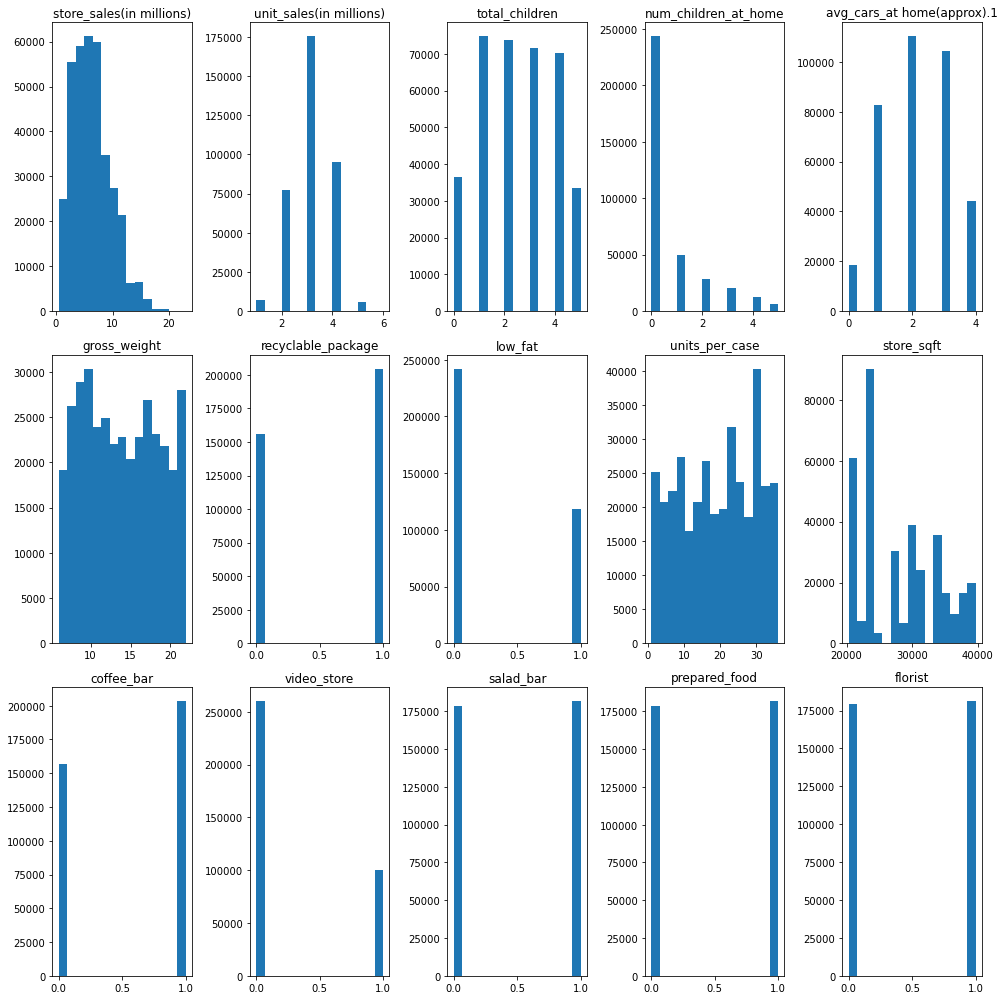

In [6]:
#plot each of the columns (since there are only 9) to visualise their distributions 
#and to make a decision on whether to normalise or standardise the data

#plt.suplots() returns a tuple containing a figure obj and an array of axes objs.
#The figure obj represents the entire figure including all the subplots
#the Axes obj represents each individual axes (hence a (3, 3) array)

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(14, 14)) #figure size is how big the figure is. NOT how big each subplot is.
for idx, col in enumerate(data.columns[:-1]):
    #grab the subplot ax by its co-ordinate in the (3, 3) array of axes
    ax = axs[idx // 5][idx % 5] #i//3 because we want 1, 2, 3 idx to give us the first row of axs i%3  because we want 1, 4, 7 to give 1
    ax.hist(data[col], bins=15)
    ax.set_title(col)
plt.tight_layout()
plt.show()

I will normalise the data to keep the original data distributions! (guess i havent considered which model I am using - as certain models assume the data is normally distributed).


I think i will use a `Random Forrest` - since its non-parametric (doesnt assume any data distributuion). It can handle both categorical and numerical data at the same time!

In [7]:
#randomly shuffle data
data = data.sample(frac=1.).reset_index()

#then split into X, y
X = data[data.columns[:-1]].copy().set_index('id')
y = data[data.columns[-1:]].copy()

In [8]:
X.shape

(360336, 15)

In [9]:
def scale(df):
    columns = df.columns
    index = df.index
    scaler = MinMaxScaler()
    scaler.fit(df)
    return pd.DataFrame(scaler.transform(df), index=index, columns=columns)

#DONT SCALE TARGET - otherwise it looses its interpretation
X_scaled = scale(X)

In [10]:
X_scaled.shape

(360336, 15)

In [17]:
#concat X and y
data_with_features_scaled = pd.concat([X_scaled, y], axis=1)
data_with_features_scaled.index.set_names('id', inplace=True)

In [20]:
#create training and testing split
def train_test_split(df, test_split=0.8):
    split_idx = round(test_split*len(df))
    train = df.iloc[:split_idx, :]
    test  = df.iloc[split_idx:, :]

    X_train = train[train.columns[:-1]].copy()
    y_train = train[train.columns[-1:]].copy()

    X_test = test[test.columns[:-1]].copy()
    y_test = test[test.columns[-1:]].copy()

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(data_with_features_scaled)

In [21]:
X_train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
152692,0.289603,0.6,0.2,0.0,1.00,0.289308,1.0,0.0,0.457143,0.698715,1.0,0.0,1.0,1.0,1.0
20496,0.419902,0.6,0.8,0.8,0.75,0.767296,0.0,1.0,0.857143,0.169221,0.0,0.0,0.0,0.0,1.0
198964,0.321731,0.2,0.4,0.0,0.25,0.012579,1.0,1.0,0.285714,0.380606,1.0,1.0,1.0,1.0,1.0
238994,0.290495,0.4,0.2,0.0,0.50,0.880503,0.0,1.0,0.057143,0.144140,1.0,1.0,1.0,1.0,1.0
44823,0.299866,0.4,0.2,0.0,1.00,0.264151,0.0,1.0,0.685714,0.513444,0.0,0.0,0.0,0.0,0.0


In [23]:
X_test.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
161693,0.178046,0.4,0.0,0.0,0.75,0.515723,1.0,1.0,0.714286,1.000000,0.0,0.0,1.0,1.0,0.0
88328,0.109772,0.4,0.8,0.0,0.50,0.358491,1.0,0.0,0.685714,0.835527,0.0,0.0,0.0,0.0,0.0
100646,0.684070,0.6,0.8,0.0,0.50,0.049057,0.0,1.0,0.342857,0.698715,1.0,0.0,1.0,1.0,1.0
325814,0.148594,0.6,0.4,0.0,0.50,0.880503,1.0,0.0,0.371429,0.177530,1.0,0.0,1.0,1.0,1.0
63727,0.021419,0.0,0.4,0.2,0.50,0.107547,0.0,1.0,0.600000,0.111421,1.0,0.0,0.0,0.0,0.0


## Model

In [24]:
# Create a random forest regressor object
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)

# Fit the regressor with X and y data
rf_regressor.fit(X_train.to_numpy(), y_train.to_numpy().reshape(-1,))

# Predict the test set results
y_pred = rf_regressor.predict(X_test.to_numpy())

In [25]:
rf_regressor.score(X_train.to_numpy(), y_train.to_numpy().reshape(-1,))

0.7924794620564871

In [26]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_true=y_test.to_numpy().reshape(-1,), y_pred=y_pred)

0.11789991056536331

## Submission

In [27]:
submission_df = pd.read_csv('./test.csv', index_col='id')
submission_df.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [28]:
submission_df.shape

(240224, 15)

In [38]:
#scale
submission_df = scale(submission_df)

#create submission predictions
submission_predictions = np.round(rf_regressor.predict(submission_df.to_numpy()), decimals=3)

In [39]:
submission = pd.DataFrame(submission_predictions, index=submission_df.index, columns=['cost'])
submission

,cost
id,
360336,120.838
360337,97.128
360338,105.380
360339,84.465
360340,106.527
...,...
600555,99.077
600556,124.668
600557,101.975


In [40]:
if os.path.exists('./submission.csv'):
    print('Submission File Already Exists')
else:
    submission.to_csv('./submission.csv')

In [41]:
! kaggle competitions submit -c playground-series-s3e11 -f submission.csv -m "First Submission"

Successfully submitted to Playground Series - Season 3, Episode 11



  0%|          | 0.00/3.52M [00:00<?, ?B/s]
  7%|▋         | 240k/3.52M [00:00<00:01, 2.35MB/s]
 39%|███▉      | 1.38M/3.52M [00:01<00:02, 891kB/s]
100%|██████████| 3.52M/3.52M [00:02<00:00, 1.33MB/s]
